# 1. Active Learning Using Support Vector Machines

## (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. 

## Choose 472 data points randomly as the test set. This is a binary classication problem.

In [495]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import csv
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from IPython.display import Image
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import LeaveOneOut
import math

In [470]:
# Impotring Data
data = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)
data.columns = ["variance", "skewness", "curtosis", "entropy","class"]

In [471]:
data[:10]

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0

In [472]:
# Making the train and test split
data_y = data['class']
data_x = data.drop(['class'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=472, random_state=42,stratify = data_y)

In [473]:
X_train[:10]

variance  skewness  curtosis  entropy
636    2.15260  -6.16650   8.08310 -0.34355
133    0.43390   5.53950   2.03300 -0.40432
338    0.96414   5.61600   2.21380 -0.12501
1048  -0.84710   3.13290  -3.01120 -2.93880
1278   0.53936   3.89440  -4.81660 -4.34180
48     3.91020   6.06500  -2.45340 -0.68234
341   -1.18040  11.50930   0.15565 -6.81940
411    4.00470   0.45937   1.36210  1.61810
101    4.55970  -2.42110   2.64130  1.61680
19     5.24230  11.02720  -4.35300 -4.10130

In [474]:
y_train[:3]

636    0
133    0
338    0
Name: class, dtype: int64

In [475]:
X_test[:3]

variance  skewness  curtosis  entropy
1076  -0.55355   -7.9233    6.7156  0.74394
389    3.79820   10.4230   -4.1602 -4.97280
652    4.64390   -3.3729    2.5976  0.55257

In [476]:
y_test[:3]

1076    1
389     0
652     0
Name: class, dtype: int64

### sol  a. The data was split according to the question

## (b) Repeat each of the following two procedures 50 times. You will have 50 errors for
## 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.1 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [480]:
# change params
parameters = {'C':[0.001,0.01, 0.1,1,10,100,1000]}
svmclf = LinearSVC(penalty='l1',dual=False)
all_error = list()

for i in range(50):
    train_join = pd.DataFrame(X_train)
    train_join["class"] = y_train
    train_join = train_join.sample(frac=1)
    while(len(train_join['class'][:10].value_counts()) != 2 or train_join['class'][:10].value_counts()[0] < 2 or train_join['class'][:10].value_counts()[1] < 2):
        train_join = train_join.sample(frac=1)
#     print(train_join['class'][:10])
#     break
    y_train = train_join["class"]
    X_train = train_join.drop("class", axis = 1)
    print(X_train[:10],y_train[:10])
    te = list()
    x = 10
    for j in range(90):
        if x == 10:
            clf = GridSearchCV(svmclf,parameters,cv = LeaveOneOut())
        else:
            clf = GridSearchCV(svmclf,parameters,cv = 10)
        
        clf.fit(X_train[:x],y_train[:x])
        print(X_train[:x],y_train[:x])
        pred_y = clf.predict(X_test)
        te.append((1-accuracy_score(y_test,pred_y)))
        x = x + 10
    print(te)
    break
   # all_error.append(te)

     variance  skewness  curtosis   entropy
192  1.457800  -0.08485   4.17850  0.591360
237  3.890500  -2.15210   2.63020  1.104700
203  4.175700  10.26150  -3.85520 -4.305600
946 -0.001285   0.13863  -0.19651  0.008175
336  3.966000   3.92130   0.70574  0.336620
238  3.999400   0.90427   1.16930  1.689200
588 -0.278020   8.18810  -3.13380 -2.527600
931 -0.492410   0.89392  -1.62830 -0.568540
685  4.071500   7.63980  -2.08240 -1.169800
423 -0.121960   8.80680   0.94566 -4.226700 192    0
237    0
203    0
946    1
336    0
238    0
588    0
931    1
685    0
423    0
Name: class, dtype: int64


In [484]:
# change params
parameters = {'C':[0.001,0.01, 0.1,1,10,100,1000]}
svmclf = LinearSVC(penalty='l1',dual=False)
all_error = list()

for i in range(50):
    train_join = pd.DataFrame(X_train)
    train_join["class"] = y_train
    train_join = train_join.sample(frac=1)
    while(len(train_join['class'][:10].value_counts()) != 2 or train_join['class'][:10].value_counts()[0] < 2 or train_join['class'][:10].value_counts()[1] < 2):
        train_join = train_join.sample(frac=1)
#     print(train_join['class'][:10])
#     break
    y_train = train_join["class"]
    X_train = train_join.drop("class", axis = 1)
    te = list()
    x = 10
    for j in range(90):
        if x == 10:
            clf = GridSearchCV(svmclf,parameters,cv = LeaveOneOut())
        else:
            clf = GridSearchCV(svmclf,parameters,cv = 10)
        
        clf.fit(X_train[:x],y_train[:x])
            
        pred_y = clf.predict(X_test)
        te.append((1-accuracy_score(y_test,pred_y)))
        x = x + 10
    all_error.append(te)

In [ ]:
clm = list(range(10,910,10))
passive = pd.DataFrame(all_error)
passive.columns = clm
passive

### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning

In [383]:
train_x = X_train.reset_index(drop = True)
train_y = y_train.reset_index(drop = True)
all_indx = train_x.index.values

In [490]:
parameters = {'C':[0.001,0.01, 0.1,1,10,100,1000]}
all_error1 = list()
svmclf = LinearSVC(penalty='l1',dual=False)

for i in range(50):
    train_join = pd.DataFrame(X_train)
    train_join["class"] = y_train
    train_join = train_join.sample(frac=1)
    while(len(train_join['class'][:10].value_counts()) != 2 or train_join['class'][:10].value_counts()[0] < 2 or train_join['class'][:10].value_counts()[1] < 2):
        train_join = train_join.sample(frac=1)
    y_train = train_join["class"]
    X_train = train_join.drop(["class"], axis = 1)
    te1 = list()
    a = list()
    y =list(range(0,10))
    for j in range(90):
        idx = [x for x in all_indx if x not in y]
        
        if len(y) == 10:
            clf = GridSearchCV(svmclf,parameters,cv = LeaveOneOut())
        else:
            clf = GridSearchCV(svmclf,parameters,cv = 10)
            
        clf.fit(train_x.loc[y],train_y.loc[y])
        pred_y = clf.predict(X_test)
        te1.append((1-accuracy_score(y_test,pred_y)))
        
        if len(idx) == 0:
            break
        decision_scores = model.decision_function(train_x.loc[idx])
        train_x['decisions'] = 0
        train_x.loc[idx]['decisions'] = decision_scores
        train_x.loc[idx]['decisions'] = train_x.loc[idx]['decisions'].abs()
        sorted_df = train_x.loc[idx].sort_values(by=['decisions'])
        a = sorted_df[:10].index.values
        train_x = train_x.drop('decisions',axis=1)
        y = y + list(a)
        
        
    all_error1.append(te1)

In [405]:
clm = list(range(10,910,10))
active = pd.DataFrame(all_error1)
active.columns = clm
active

10        20        30        40        50        60        70   \
0   0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
1   0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
2   0.188559  0.105932  0.023305  0.088983  0.057203  0.019068  0.031780   
3   0.188559  0.103814  0.023305  0.088983  0.057203  0.019068  0.031780   
4   0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
5   0.188559  0.078390  0.023305  0.088983  0.057203  0.019068  0.031780   
6   0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
7   0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
8   0.188559  0.082627  0.023305  0.088983  0.057203  0.019068  0.031780   
9   0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
10  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
11  0.188559  0.095339  0.023305  0.088983  0.057203  0.019068  0.031780   
12  0.188559  0.091102  0.023305  0.088983  0.057203  0.019068  0.031780   
13  0.188559  0.082627  0.023305  0.088983  0.057203  0.019068  0.031780   
14  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
15  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
16  0.188559  0.110169  0.023305  0.088983  0.057203  0.019068  0.029661   
17  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
18  0.188559  0.110169  0.023305  0.088983  0.057203  0.019068  0.031780   
19  0.188559  0.095339  0.023305  0.088983  0.057203  0.019068  0.031780   
20  0.188559  0.078390  0.023305  0.088983  0.057203  0.019068  0.031780   
21  0.188559  0.103814  0.023305  0.063559  0.057203  0.019068  0.031780   
22  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
23  0.188559  0.110169  0.023305  0.088983  0.057203  0.019068  0.031780   
24  0.188559  0.072034  0.023305  0.088983  0.057203  0.019068  0.029661   
25  0.188559  0.137712  0.023305  0.088983  0.057203  0.019068  0.031780   
26  0.188559  0.080508  0.023305  0.088983  0.057203  0.019068  0.031780   
27  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
28  0.188559  0.110169  0.023305  0.063559  0.057203  0.019068  0.031780   
29  0.188559  0.069915  0.023305  0.088983  0.057203  0.019068  0.031780   
30  0.188559  0.137712  0.023305  0.088983  0.057203  0.019068  0.031780   
31  0.188559  0.105932  0.023305  0.088983  0.057203  0.019068  0.031780   
32  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
33  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
34  0.188559  0.148305  0.023305  0.061441  0.057203  0.019068  0.031780   
35  0.188559  0.110169  0.023305  0.088983  0.057203  0.019068  0.031780   
36  0.188559  0.110169  0.023305  0.088983  0.057203  0.019068  0.031780   
37  0.188559  0.133475  0.023305  0.088983  0.057203  0.019068  0.031780   
38  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
39  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   
40  0.188559  0.148305  0.023305  0.057203  0.057203  0.019068  0.031780   
41  0.188559  0.103814  0.023305  0.088983  0.057203  0.019068  0.031780   
42  0.188559  0.084746  0.023305  0.088983  0.057203  0.019068  0.031780   
43  0.188559  0.101695  0.023305  0.088983  0.057203  0.019068  0.031780   
44  0.188559  0.112288  0.023305  0.088983  0.057203  0.019068  0.031780   
45  0.188559  0.080508  0.023305  0.088983  0.057203  0.019068  0.031780   
46  0.188559  0.101695  0.023305  0.088983  0.057203  0.019068  0.031780   
47  0.188559  0.118644  0.023305  0.088983  0.057203  0.019068  0.031780   
48  0.188559  0.084746  0.023305  0.088983  0.057203  0.019068  0.031780   
49  0.188559  0.148305  0.023305  0.088983  0.057203  0.019068  0.031780   

         80        90        100    ...          810       820       830  \
0   0.029661  0.040254  0.040254    ...     0.010593  0.

## (c) Average the test errors for the incrementally trained 90 SVMs in 1(b)i and1(b)ii.By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions.

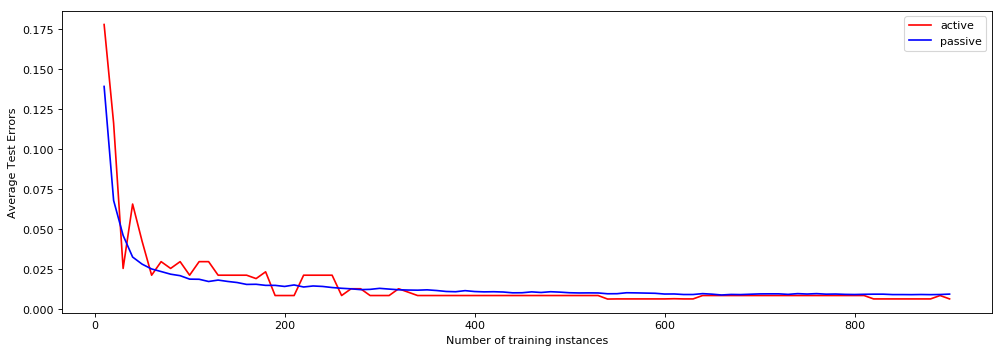

In [492]:
train_inst = list(range(10,910,10))
passive = list()
active = list()

for l in range(90):
    total = 0
    total1 = 0
    for k in range(50):
        total = total + all_error[k][l]
        total1 = total1 + all_error1[k][l]
        

    avg = total/50
    avg1 = total1/50
    passive.append(avg)
    active.append(avg1)

 

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(train_inst, active, 'r', label ='active') # plotting t, a separately 
plt.plot(train_inst, passive, 'b',label= 'passive') # plotting t, b separately  
plt.xlabel("Number of training instances")
plt.ylabel("Average Test Errors")
plt.legend(loc='best')
plt.show()

# 2. Multi-class Classication Using Support Vector Machines

## (a) Download the Anuran Calls (MFCCs) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29#.
## Choose 70% of the data randomly as the training set.

In [352]:
anu_data = pd.read_csv('Frogs_MFCCs.csv', sep=",", header=0)

In [353]:
anu_data[:3]

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10    ...     MFCCs_17  MFCCs_18  MFCCs_19  \
0 -0.150063 -0.171128  0.124676    ...    -0.108351 -0.077623 -0.009568   
1 -0.222475 -0.207693  0.170883    ...    -0.090974 -0.056510 -0.035303   
2 -0.242234 -0.219153  0.232538    ...    -0.050691 -0.023590 -0.066722   

   MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus         Species  \
0  0.057684  0.118680  0.014038  Leptodactylidae  Adenomera  AdenomeraAndre   
1  0.020140  0.082263  0.029056  Leptodactylidae  Adenomera  AdenomeraAndre   
2 -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera  AdenomeraAndre   

   RecordID  
0         1  
1         1  
2         1  

[3 rows x 26 columns]

In [354]:
data_label = pd.DataFrame()
data_label['Family'] = anu_data['Family']
data_label['Genus'] = anu_data['Genus']
data_label['Species'] = anu_data['Species']

data_data = anu_data.drop(['Family','Genus','Species','RecordID'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data_data,data_label, test_size=0.30, random_state=42)

In [355]:
X_train[:3]

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
2004  1.000000  0.327476  0.282440  0.572211  0.096509 -0.036705 -0.082174   
1194  1.000000  0.232818 -0.144331 -0.078909 -0.072467  0.255380  0.450215   
5359  0.966443  0.455914  1.000000  0.541650 -0.412873  0.307099  0.235819   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10    ...     MFCCs_13  MFCCs_14  MFCCs_15  \
2004  0.146604  0.297338 -0.120902    ...     0.438532 -0.148451 -0.260375   
1194  0.261033 -0.168462 -0.281445    ...    -0.108483  0.329984  0.274031   
5359 -0.064025  0.069728 -0.052552    ...    -0.073050 -0.140994  0.162584   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
2004  0.178628  0.218024 -0.042083 -0.126511 -0.090279  0.096176  0.191697  
1194 -0.157579 -0.291979 -0.042932 -0.009021 -0.032679  0.023912  0.041407  
5359 -0.007981 -0.049428 -0.053166 -0.026728  0.029443  0.019032 -0.105221  

[3 rows x 22 columns]

In [356]:
y_train[:3]

Family      Genus                 Species
2004  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1194    Dendrobatidae   Ameerega      Ameeregatrivittata
5359          Hylidae  Hypsiboas    HypsiboasCinerascens

In [357]:
X_test[:3]

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
3340       1.0  0.147506  0.014843  0.433466  0.169581  0.053135 -0.152020   
5108       1.0  0.674174  0.767520  0.392177  0.035669  0.181548 -0.013677   
6524       1.0 -0.007777  0.363276  0.413224  0.196296  0.222389  0.097128   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10    ...     MFCCs_13  MFCCs_14  MFCCs_15  \
3340 -0.102427  0.153061  0.128628    ...     0.341701  0.008463 -0.290680   
5108  0.187262  0.144679 -0.424524    ...    -0.142909 -0.209932  0.285255   
6524 -0.155608 -0.035013  0.133689    ...     0.016052 -0.028317 -0.102525   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
3340  0.016310  0.285756  0.166246 -0.061206 -0.191878  0.003221  0.255371  
5108  0.103722 -0.157943 -0.048913 -0.016129  0.129200  0.011245 -0.275909  
6524 -0.005594  0.125169  0.044882 -0.013309 -0.026086 -0.088825 -0.018968  

[3 rows x 22 columns]

In [358]:
y_test[:3]

Family      Genus                 Species
3340  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
5108          Hylidae  Hypsiboas    HypsiboasCinerascens
6524          Hylidae  Hypsiboas       HypsiboasCordobae

## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classifcation is to train a classifer for each label. We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi-label classication and use them in evaluating the classiers in this problem.

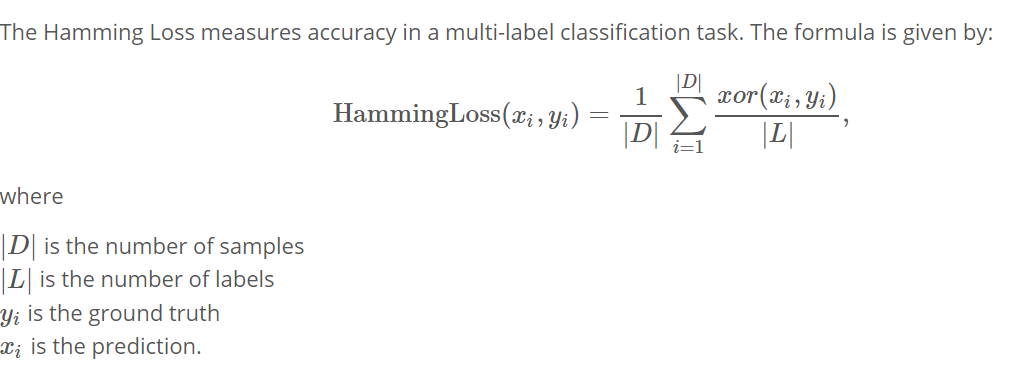

In [359]:
Image(filename='img1.png') 

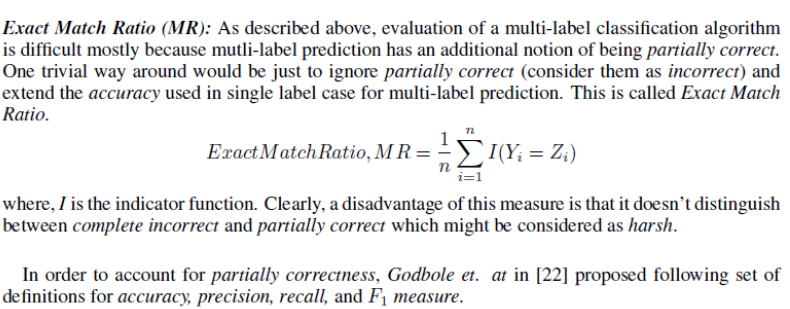

In [360]:
Image(filename='img2.png') 

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both normalized and raw attributes and report the results.

In [361]:
def hamming_score1(l1, l2):
    sum = 0
    for item1, item2 in zip(l1, l2):
        sum += 1 if item1==item2 else 0
    return sum/len(l1)

In [362]:
def accuracy_score1(l1, l2):
    for item1, item2 in zip(l1, l2):
        if item1!=item2:
            return 0
    return 1

In [363]:
def score_(y_true, y_pred, type="exact_match"):
    sum = 0
    y, x = y_true.shape
    for true, predicted in zip(y_true, y_pred):
        if type == 'exact_match':
            sum += accuracy_score1(true, predicted)
        else:
            sum += hamming_score1(true, predicted)
        
    sum /= len(y_true)
    return sum

### As given in the data description the data is already normalized. Since normalization can occur between any two ranges, it is a fair assumption that since the data lies in [-1,1] it will not cause any change in the results even if we normailze it to [0,1]

In [364]:
# Width is sigma

sig = np.array(range(1,2,1))/10
gamma = 1/(2*sig*sig)
params = {'estimator__C':[0.001,0.01, 0.1,1,10,100,1000],'estimator__gamma':gamma}

mclf1 = OneVsRestClassifier(SVC())
mclf2 = OneVsRestClassifier(SVC())
mclf3 = OneVsRestClassifier(SVC())

clf1 = GridSearchCV(mclf1,params,cv = 10)
clf2 = GridSearchCV(mclf2,params,cv = 10)
clf3 = GridSearchCV(mclf3,params,cv = 10)

model1 = clf1.fit(X_train, y_train['Family'])
model2 = clf2.fit(X_train, y_train['Genus'])
model3 = clf3.fit(X_train, y_train['Species'])


In [365]:
pred_y1 = model1.predict(X_test)
pred_y2 = model2.predict(X_test)
pred_y3 = model3.predict(X_test)
predicted = np.array([pred_y1, pred_y2, pred_y3]).T
w1 = model1.best_params_
w2 = model2.best_params_
w3 = model3.best_params_

In [507]:
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is",w1," The sigma is",math.sqrt((1/w1.estimator__gamma)))
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is",w2," The sigma is",math.sqrt((1/w2.estimator__gamma)))
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is",w3," The sigma is",math.sqrt((1/w3.estimator__gamma)))
print("The overall exact match loss for the Labels is", 1-score_(np.array(y_test), predicted, "exact_match"))
print("The overall hamming loss for the Labels is",1-score_(np.array(y_test), predicted, "hamming"))

The SVM weight of penalty and width of the Gaussian Kernel for the Label Family is {'estimator__C': 10}, The sigma is 0.144 
The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is {'estimator__C': 10}, The sigma is 0.134 
The SVM weight of penalty and width of the Gaussian Kernel for the Label Species is {'estimator__C': 10},  The sigma is 0.147 
The overall exact match loss for the Labels is 0.02440481704492822 
The overall hamming loss for the Labels is 0.01537903350316545


### iii. Repeat 2(b)ii with L1-penalized SVMs. Remember to normalize the attributes.

### As given in the data description the data is already normalized. Since normalization can occur between any two ranges, it is a fair assumption that since the data lies in [-1,1] it will not cause any change in the results even if we normailze it to [0,1]

In [367]:
#Linear SVM model
# Width is sigma

sig = np.array(range(1,10,1))/10
params = {'C':[0.001,0.01, 0.1,1,10,100,1000]}


mclf1 = svm.LinearSVC(loss='l2', penalty='l1', dual=False)
mclf2 = svm.LinearSVC(loss='l2', penalty='l1', dual=False)
mclf3 = svm.LinearSVC(loss='l2', penalty='l1', dual=False)

clf1 = GridSearchCV(mclf1,params,cv = 10)
clf2 = GridSearchCV(mclf2,params,cv = 10)
clf3 = GridSearchCV(mclf3,params,cv = 10)

model1 = clf1.fit(X_train, y_train['Family'])
model2 = clf2.fit(X_train, y_train['Genus'])
model3 = clf3.fit(X_train, y_train['Species'])

In [368]:
pred_y1 = model1.predict(X_test)
pred_y2 = model2.predict(X_test)
pred_y3 = model3.predict(X_test)
predicted = np.array([pred_y1, pred_y2, pred_y3]).T
w1 = model1.best_params_
w2 = model2.best_params_
w3 = model3.best_params_

In [369]:
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Family is",w1)
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is",w2)
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Species is",w3)
print("\nThe overall exact match loss for the Labels is", 1-score_(np.array(y_test), predicted, "exact_match"))
print("\nThe overall hamming loss for the Labels is",1-score_(np.array(y_test), predicted, "hamming"))

The SVM weight of penalty and width of the Gaussian Kernel for the Label Family is {'C': 10}
The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is {'C': 1000}
The SVM weight of penalty and width of the Gaussian Kernel for the Label Species is {'C': 100}

The overall exact match loss for the Labels is 0.08985641500694763

The overall hamming loss for the Labels is 0.057279604755287594


### iv. Repeat 2(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classiers you trained.

In [370]:
sm = SMOTE(random_state=42)
X_res1, y_res1 = sm.fit_sample(X_train, y_train['Family'])
X_res2, y_res2 = sm.fit_sample(X_train, y_train['Genus'])
X_res3, y_res3 = sm.fit_sample(X_train, y_train['Species'])

In [371]:
sig = np.array(range(1,10,1))/10
params = {'C':[0.001,0.01, 0.1,1,10,100,1000]}


mclf1 = svm.LinearSVC(loss='l2', penalty='l1', dual=False)
mclf2 = svm.LinearSVC(loss='l2', penalty='l1', dual=False)
mclf3 = svm.LinearSVC(loss='l2', penalty='l1', dual=False)

clf1 = GridSearchCV(mclf1,params,cv = 10)
clf2 = GridSearchCV(mclf2,params,cv = 10)
clf3 = GridSearchCV(mclf3,params,cv = 10)

model1 = clf1.fit(X_res1, y_res1)
model2 = clf2.fit(X_res2, y_res2)
model3 = clf3.fit(X_res3, y_res3)

In [372]:
pred_y1 = model1.predict(X_test)
pred_y2 = model2.predict(X_test)
pred_y3 = model3.predict(X_test)
predicted = np.array([pred_y1, pred_y2, pred_y3]).T
w1 = model1.best_params_
w2 = model2.best_params_
w3 = model3.best_params_

In [373]:
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Family is",w1)
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is",w2)
print("The SVM weight of penalty and width of the Gaussian Kernel for the Label Species is",w3)
print("\nThe overall exact match loss for the Labels is", 1-score_(np.array(y_test), predicted, "exact_match"))
print("\nThe overall hamming loss for the Labels is",1-score_(np.array(y_test), predicted, "hamming"))

The SVM weight of penalty and width of the Gaussian Kernel for the Label Family is {'C': 1000}
The SVM weight of penalty and width of the Gaussian Kernel for the Label Genus is {'C': 1000}
The SVM weight of penalty and width of the Gaussian Kernel for the Label Species is {'C': 100}

The overall exact match loss for the Labels is 0.14265863825845304

The overall hamming loss for the Labels is 0.07457156090782602


### Conclusion 

### Since the data was pre-normalized and the solutions after re-normalizing to [0,1] did not cause any stastical changes that could be reported the conclusions are based on data which is pre-normmalized to [-1,1]

### SVC Classifier (Radial Kernel) : Hamming Loss = .01 Exact Match Loss = .02
### SVC Classifier (Linear Kernel, Penalty = L1) : Hamming Loss = 0.05  Exact Match Loss = 0.08
### SVC Classifier (Linear Kernel, Penalty = L1, Balanced Class(SMOTE)) : Hamming Loss = 0.07 Exact Match Loss = 0.14

### The best SVC Classifier is SVC Classifier with Radial Kernel with an exact match of 99 %  and Hamming loss of 2 %  


### Note : 1How to choose parameter ranges for SVMs? One can use wide ranges for the parameters and a negrid (e.g. 1000 points) for cross validation; however,this method may be computationally expensive. An alternative way is to train the SVM with very large and very small parameters on the whole training data and nd very large and very small parameters for which the training accuracy is not below a threshold (e.g., 70%). Then one can select a xed number of parameters (e.g., 20) between those points for cross validation.For the penalty parameter, usually one has to consider increments in log(). For example, if one found that the accuracy of a support vector machine will not be below 70% for  = 10􀀀3 and  = 106, one has to choose log() 2 f􀀀3;􀀀2; : : : ; 4; 5; 6g. For the Gaussian Kernel parameter, one usually chooses linear increments,e.g.  2 f:1; :2; : : : ; 2g. When both  and  are to be chosen using cross-validation, combinations of very small and very large 's and 's that keep the accuracy above a threshold (e.g.70%) can be used to determine the ranges for  and . Please note that these are very rough rules of thumb, not general procedures. 2You may use the result from linear algebra about the distance of a point from a hyperplane.